In [2]:
%matplotlib notebook

<IPython.core.display.Javascript object>


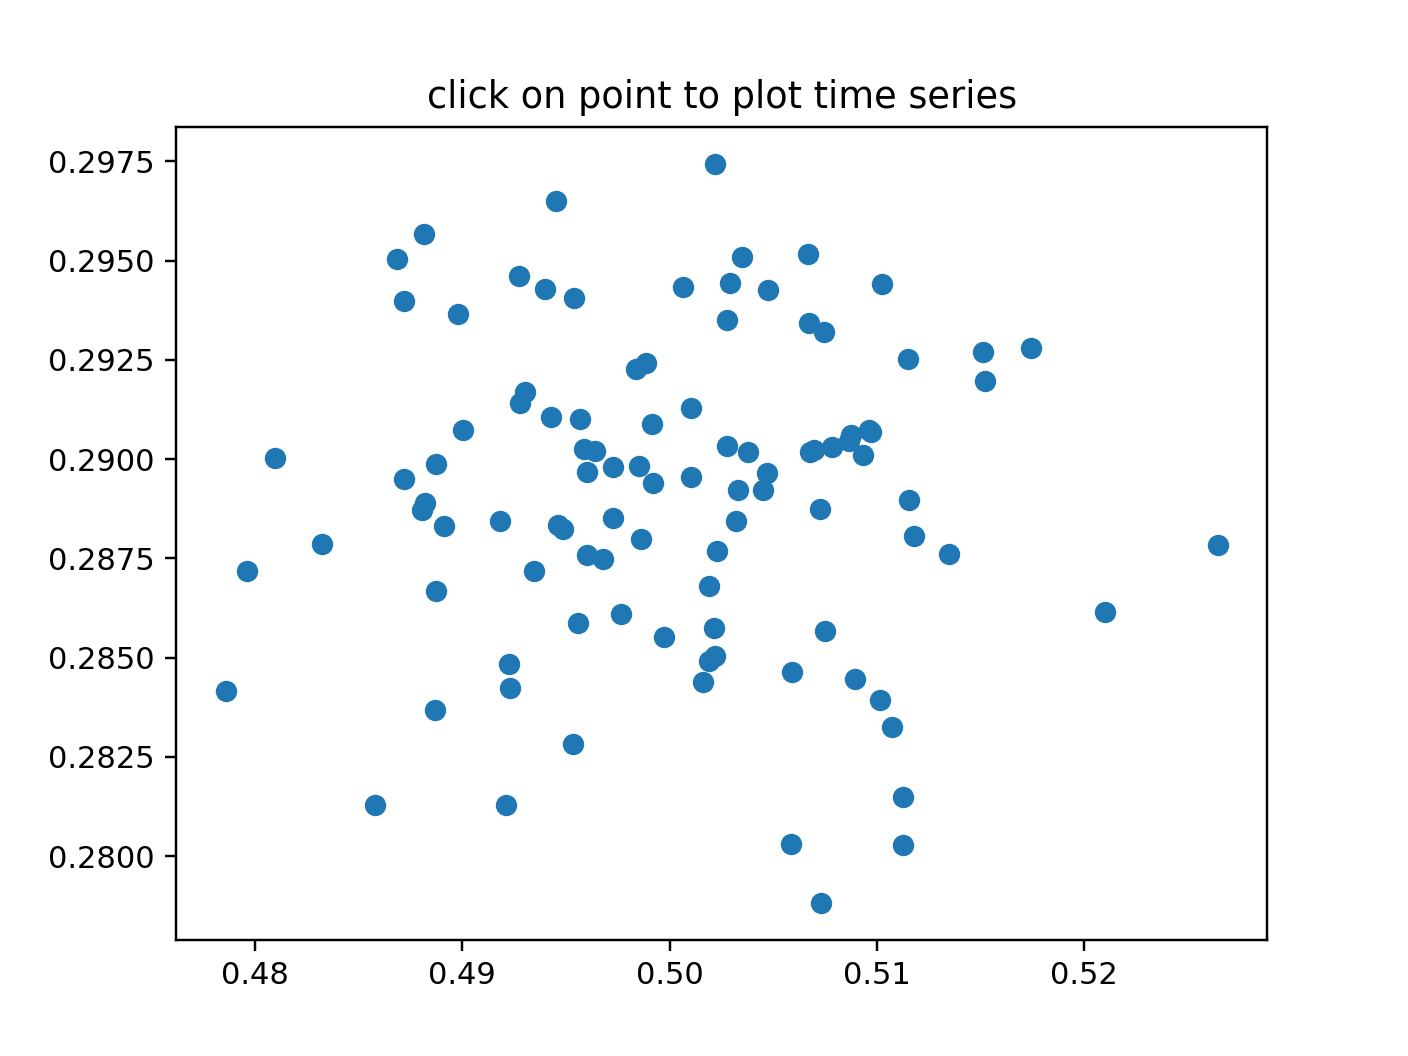

In [3]:
import numpy as np
import matplotlib.pyplot as plt


X = np.random.rand(100, 1000)
xs = np.mean(X, axis=1)
ys = np.std(X, axis=1)

fig, ax = plt.subplots()
ax.set_title('click on point to plot time series')
line, = ax.plot(xs, ys, 'o', picker=5)  # 5 points tolerance


def onpick(event):

    if event.artist != line:
        return True

    N = len(event.ind)
    if not N:
        return True

    figi, axs = plt.subplots(N, squeeze=False)
    for ax, dataind in zip(axs.flat, event.ind):
        ax.plot(X[dataind])
        ax.text(.05, .9, 'mu=%1.3f\nsigma=%1.3f' % (xs[dataind], ys[dataind]),
                transform=ax.transAxes, va='top')
        ax.set_ylim(-0.5, 1.5)
    figi.show()
    return True

fig.canvas.mpl_connect('pick_event', onpick)

plt.show()
